In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [19]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
  
# data (as pandas dataframes) 
X = cervical_cancer_risk_factors.data.features 
y = cervical_cancer_risk_factors.data.targets 
  
# metadata 
print(cervical_cancer_risk_factors.metadata) 
  
# variable information 
print(cervical_cancer_risk_factors.variables) 


{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'ID': 419, 'type': 'NATIVE', 'title': 'Transfer Learning with Partial Observability Applied to Cervi

In [4]:
X.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [6]:
print(type(y))  # Vérifier le type de y
print(y)  # Afficher le contenu de y

<class 'NoneType'>
None


In [7]:
print(cervical_cancer_risk_factors.data)

{'ids': None, 'features':      Age  Number of sexual partners  First sexual intercourse  \
0     18                        4.0                      15.0   
1     15                        1.0                      14.0   
2     34                        1.0                       NaN   
3     52                        5.0                      16.0   
4     46                        3.0                      21.0   
..   ...                        ...                       ...   
853   34                        3.0                      18.0   
854   32                        2.0                      19.0   
855   25                        2.0                      17.0   
856   33                        2.0                      24.0   
857   29                        2.0                      20.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   1.0     0.0             0.0                  0.0   
1                   1.0     0.0             0.0  

In [8]:
y = X["Biopsy"]  # Récupérer la colonne cible
X = X.drop(columns=["Biopsy"])  # Supprimer la cible des features

In [10]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: Biopsy, dtype: int64

In [11]:
print(X.isnull().sum())

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

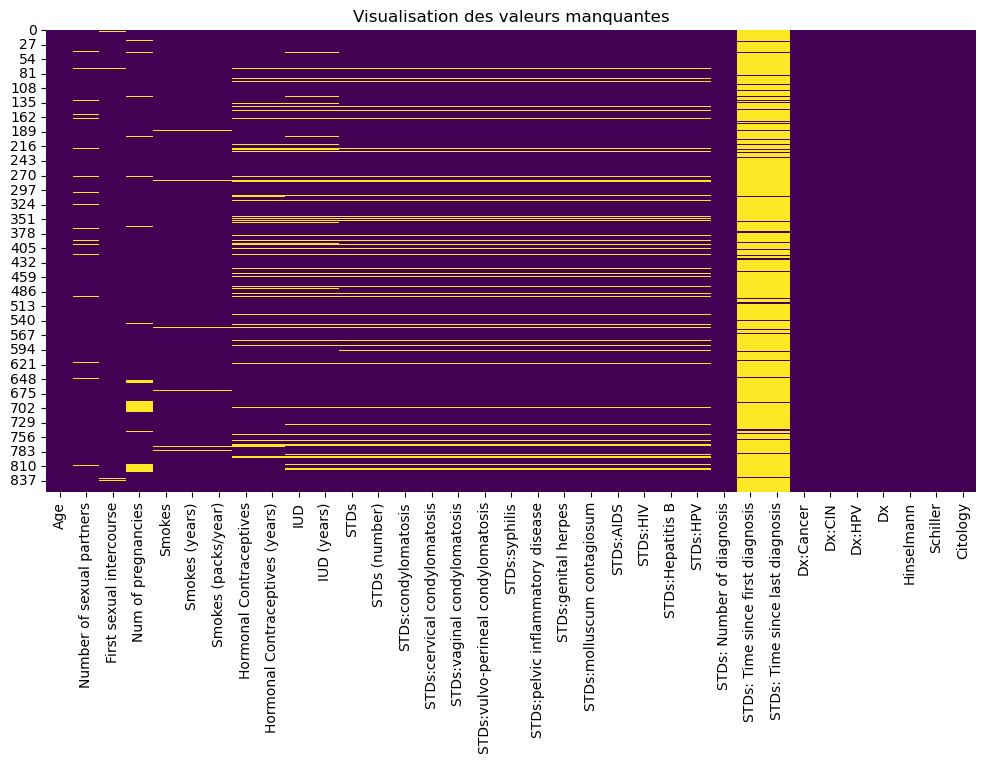

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(X.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisation des valeurs manquantes")
plt.show()

In [20]:
print(X.shape)


(858, 36)


In [22]:
X = X.drop(columns=X.columns[X.isnull().sum() == 787])

           

In [23]:
print(X.shape)

(858, 34)


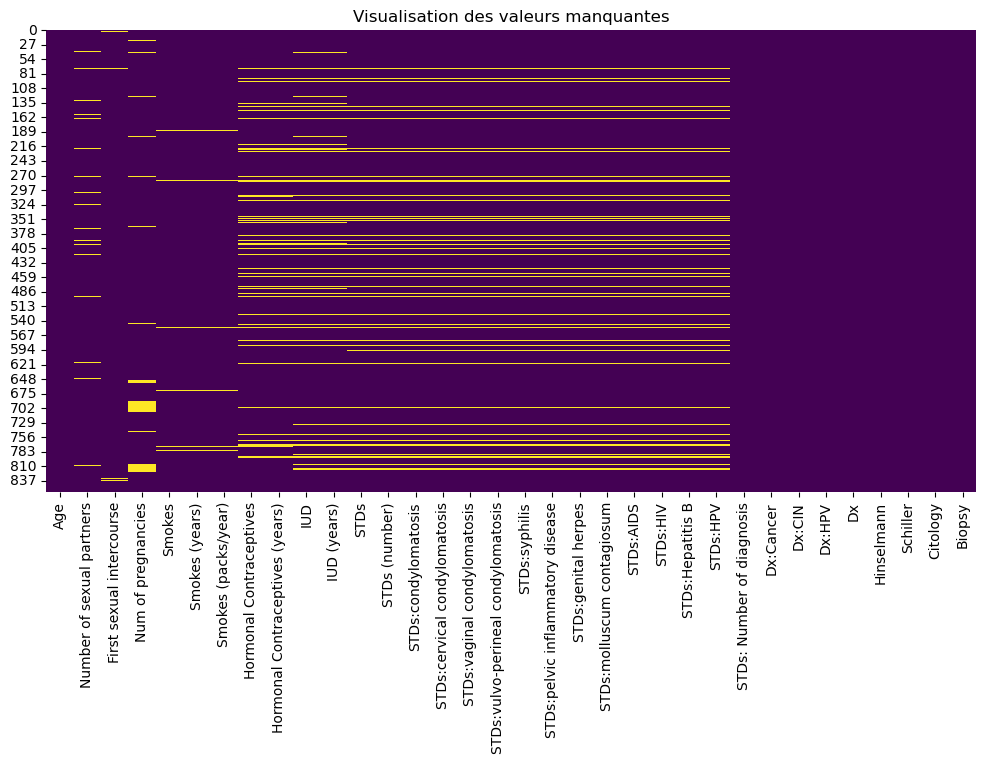

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(X.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisation des valeurs manquantes")
plt.show()

In [25]:
# 2️⃣ Remplacement des valeurs manquantes pour les colonnes restantes
for col in X.columns:
    if X[col].dtype == "object":  # Si la colonne est catégorielle
        X[col].fillna(X[col].mode()[0], inplace=True)  # Remplacement par la valeur la plus fréquente (modale)
    else:  # Si la colonne est numérique
        X[col].fillna(X[col].median(), inplace=True)  # Remplacement par la médiane

# 3️⃣ Vérification : afficher le nombre de valeurs manquantes restantes
print(f"Nombre total de valeurs manquantes après traitement : {X.isnull().sum().sum()}")  # Doit afficher 0

Nombre total de valeurs manquantes après traitement : 0


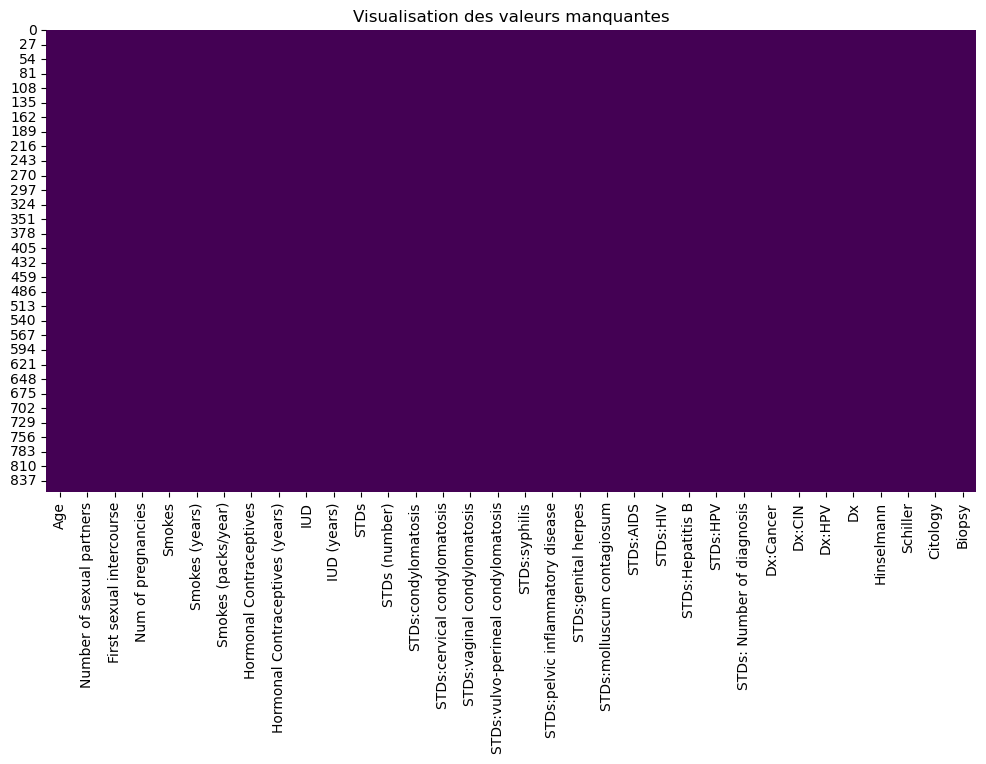

In [26]:
plt.figure(figsize=(12, 6))
sns.heatmap(X.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisation des valeurs manquantes")
plt.show()

In [27]:
print(X.duplicated().sum())  # Affiche le nombre de doublons


28


In [28]:
X = X.drop_duplicates()


In [29]:
print(X.duplicated().sum())  # Doit afficher 0 si tous les doublons ont été supprimés


0


In [34]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Transforme les données

# Convertir en DataFrame avec les mêmes noms de colonnes
X = pd.DataFrame(X_scaled, columns=X.columns)

print(X.head())  # Vérification


        Age  Number of sexual partners  First sexual intercourse  \
0  0.070423                   0.111111                  0.227273   
1  0.028169                   0.000000                  0.181818   
2  0.295775                   0.000000                  0.318182   
3  0.549296                   0.148148                  0.272727   
4  0.464789                   0.074074                  0.500000   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0            0.090909     0.0             0.0                  0.0   
1            0.090909     0.0             0.0                  0.0   
2            0.090909     0.0             0.0                  0.0   
3            0.363636     1.0             1.0                  1.0   
4            0.363636     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      0.0                              0.0  0.0  ...   
1                      0

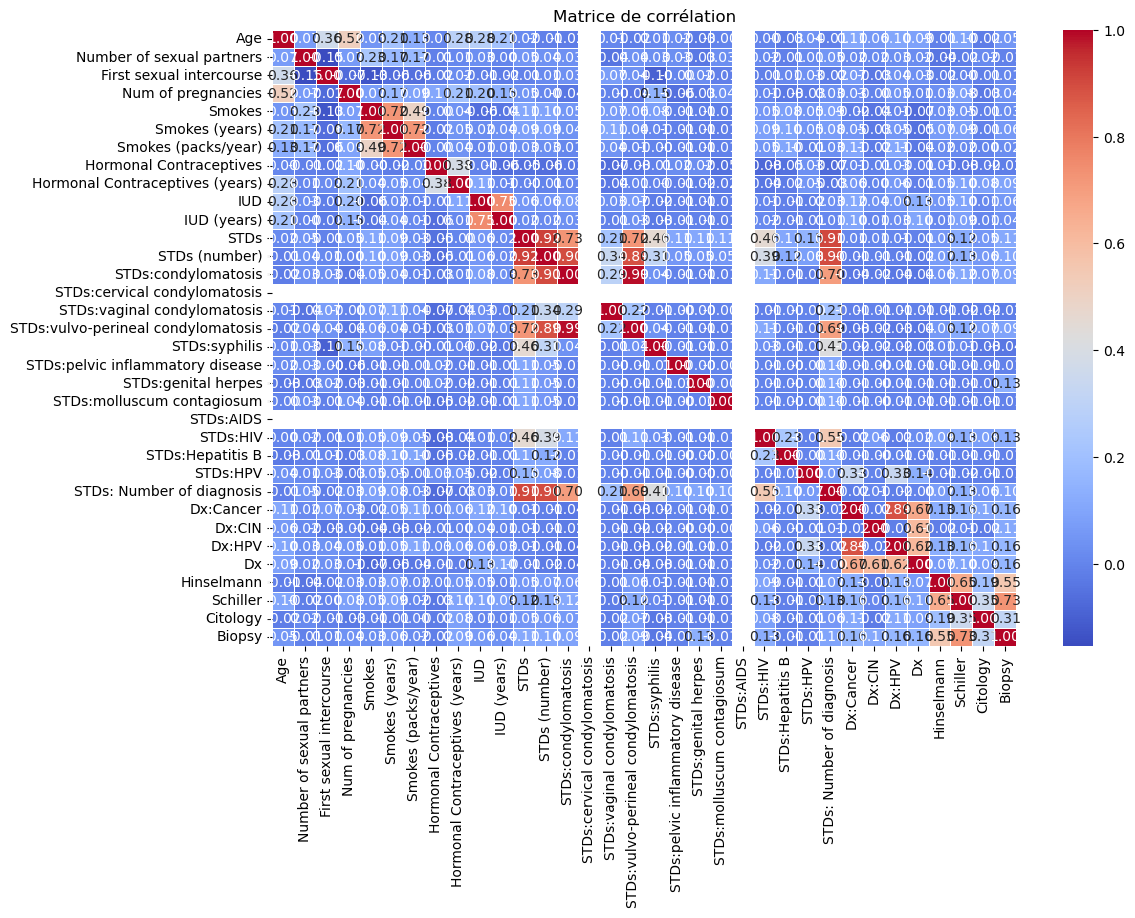

In [36]:
corr = X.corr()  # Calcul de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()